# Regression Decision Tree / Regression Tree

* We know decision tree is a Supervised technique/algorithm used for both Classification and Regression.

* We have already seen the Classification model of Decision Tree using 'type of breast_cancer dataset'. Now, it's time for Regression model of Decision Tree.

* In Classification, the outcome is Discrete(yes/no), (0,1), (True/False).
* In Regression, the outcome is continous (specific numeric value).

# Importing the data and neccesary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'E:\Downloads\petrol_consumption (1).csv')
df.head(10)

,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,1976,0.525,541
1,1250,0.572,524
2,1586,0.580,561
3,2351,0.529,414
4,431,0.544,410
5,1333,0.571,457
6,11868,0.451,344
7,2138,0.553,467
8,8577,0.529,464
9,8507,0.552,498


In [3]:
df.shape

(48, 3)

In [4]:
df.ndim

2

# Extracting independent and dependent variable.

In [5]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [6]:
x.head()

,Paved_Highways,Population_Driver_licence(%)
0,1976,0.525
1,1250,0.572
2,1586,0.580
3,2351,0.529
4,431,0.544


In [7]:
y.head()

0    541
1    524
2    561
3    414
4    410
Name: Petrol_Consumption, dtype: int64

In [8]:
y.mean()

576.7708333333334

In [9]:
##10% of 576

perc=(10/100)*576
perc

57.6

# Train and Test Split / Model Creation

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [40]:
from sklearn.tree import DecisionTreeRegressor
reg=DecisionTreeRegressor(criterion='mse',max_depth=10,max_features=1.0,min_samples_split=0.25,splitter='random')
reg.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10, max_features=1.0, min_samples_split=0.25,
                      splitter='random')

* Default parameters after creating a regression decision Tree
* DecisionTreeRegressor(criterion=’mse’, max_depth=None, max_features = None, max_leaf_nodes=None, min_impurity_decrease=0.0,
min_impurity_split = None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, presort=False, random_state=0, splitter=’best’)

best_parameters:  {'criterion': 'mse',
 'max_depth': 10,
 'max_features': 1.0,
 'min_samples_split': 0.25,
 'splitter': 'random'}

In [41]:
y_pred=reg.predict(x_test)
y_pred

array([600.25      , 500.14285714, 600.25      , 542.71428571,
       600.25      , 600.25      , 578.4       , 725.75      ,
       500.14285714, 600.25      , 640.        , 542.71428571,
       578.4       , 542.71428571, 542.71428571])

# Accuracy Check and Evaluation of the model

* Evaluating the Algorithm
* To evaluate performance of the regression algorithm, the commonly used metrics are mean absolute error, mean squared error, and root mean squared error. The Scikit-Learn library contains functions that can help calculate these values for us. To do so, use this code from the metrics package:

In [42]:
pd.DataFrame({'Actual':y_test,'Predicted':y_pred})     #random state

,Actual,Predicted
29,534,600.250000
4,410,500.142857
26,577,600.250000
30,571,542.714286
32,577,600.250000
37,704,600.250000
34,487,578.400000
40,587,725.750000
7,467,500.142857
10,580,600.250000


In [43]:
from sklearn import metrics
print(metrics.mean_squared_error(y_test,y_pred))

6237.814632653061


In [44]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

-0.19964535867512323

In [45]:
reg.score(x_test,y_test)

-0.19964535867512323

In [46]:
reg.score(x_train,y_train)

0.5686330942767246

In [47]:
print(metrics.mean_absolute_error(y_test,y_pred))

63.69047619047619


* The mean absolute error for our algorithm is 48.07, which is less than 10 percent of the mean of all the values in the 'Petrol_Consumption' column. This means that our algorithm did a fine prediction job. Mean of the target column(Petol_Consumption column) is 576 and 10 % of it, is 57.6

In [48]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

78.97983687405959


In [23]:
text_representation = tree.export_text(reg)
print(text_representation)

NameError: name 'tree' is not defined

[Text(418.5, 504.7714285714286, 'X[1] <= 0.614\nmse = 15106.716\nsamples = 33\nvalue = 587.364'),
 Text(279.0, 427.11428571428576, 'X[1] <= 0.451\nmse = 7027.194\nsamples = 25\nvalue = 543.08'),
 Text(139.5, 349.4571428571429, 'mse = 0.0\nsamples = 1\nvalue = 344.0'),
 Text(418.5, 349.4571428571429, 'X[0] <= 2574.117\nmse = 5599.818\nsamples = 24\nvalue = 551.375'),
 Text(279.0, 271.8, 'mse = 2588.408\nsamples = 7\nvalue = 500.143'),
 Text(558.0, 271.8, 'X[0] <= 10858.881\nmse = 5314.014\nsamples = 17\nvalue = 572.471'),
 Text(418.5, 194.14285714285717, 'X[0] <= 6554.408\nmse = 5343.312\nsamples = 16\nvalue = 568.25'),
 Text(279.0, 116.48571428571432, 'X[0] <= 4406.659\nmse = 6107.877\nsamples = 9\nvalue = 588.111'),
 Text(139.5, 38.82857142857142, 'mse = 7254.64\nsamples = 5\nvalue = 578.4'),
 Text(418.5, 38.82857142857142, 'mse = 4409.188\nsamples = 4\nvalue = 600.25'),
 Text(558.0, 116.48571428571432, 'mse = 3201.061\nsamples = 7\nvalue = 542.714'),
 Text(697.5, 194.14285714285717, 

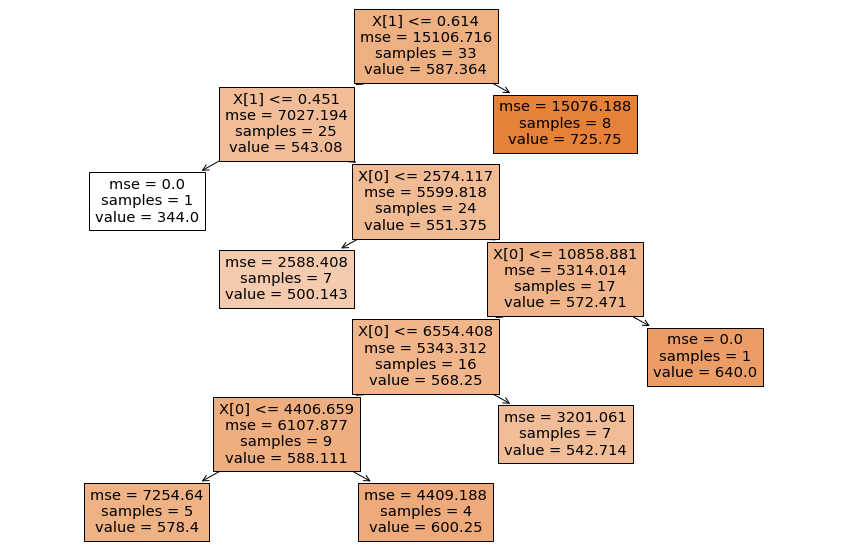

In [49]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(reg,filled=True)

# HyperParameter Tuning

In [28]:
param_dict={
    'criterion':['mse','mae','friedman_mse'],
    'splitter':['random','best'],
    'max_depth':[0,2,3,4,5,6,7,8,9,10],
    'max_features':[0.25,0.5,1.0],
    'min_samples_split':[0.25,0.5,1.0,2]
}

In [37]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(reg,param_grid=param_dict)
grid.fit(x_train,y_train)

C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1242, in fit
    super().fit(
  File "C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 277, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1242, in fit
    super().fit(
  File "C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 277, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1242, in fit
    super().fit(
  File "C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 277, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1242, in fit
    super().fit(
  File "C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 277, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1242, in fit
    super().fit(
  File "C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 277, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1242, in fit
    super().fit(
  File "C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 277, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1242, in fit
    super().fit(
  File "C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 277, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1242, in fit
    super().fit(
  File "C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 277, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1242, in fit
    super().fit(
  File "C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 277, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1242, in fit
    super().fit(
  File "C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 277, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1242, in fit
    super().fit(
  File "C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 277, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1242, in fit
    super().fit(
  File "C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 277, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1242, in fit
    super().fit(
  File "C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 277, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Prabhat Dangi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this tra

GridSearchCV(estimator=DecisionTreeRegressor(max_depth=3),
             param_grid={'criterion': ['mse', 'mae', 'friedman_mse'],
                         'max_depth': [0, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': [0.25, 0.5, 1.0],
                         'min_samples_split': [0.25, 0.5, 1.0, 2],
                         'splitter': ['random', 'best']})

In [38]:
grid.best_score_

0.24562766359460508

In [39]:
grid.best_params_

{'criterion': 'mse',
 'max_depth': 10,
 'max_features': 1.0,
 'min_samples_split': 0.25,
 'splitter': 'random'}

# Pruning

In [ ]:
path=reg.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas,impurities=path.ccp_alphas,path.impurities
ccp_alphas

In [ ]:
regs=[]
for i in ccp_alphas:
    reg=DecisionTreeRegressor(ccp_alpha=i,random_state=0)
    reg.fit(x_train,y_train)
    regs.append(reg)

In [ ]:
pd.DataFrame(regs)

* We got 10 regressors with their ccp_alphas.

Plot

In [ ]:
train_scores=[reg.score(x_train,y_train) for reg in regs]
test_scores=[reg.score(x_test,y_test) for reg in regs]

fig,ax=plt.subplots()

ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for train and test sets')

ax.plot(ccp_alphas,train_scores,marker='o',label='train',drawstyle='steps-post')
ax.plot(ccp_alphas,test_scores,marker='o',label='test',drawstyle='steps-post')

ax.legend()

plt.show()




In [ ]:
reg=DecisionTreeRegressor(random_state=0,ccp_alpha=3000)
reg.fit(x_train,y_train)

In [ ]:
reg.score(x_train,y_train)

In [ ]:
reg.score(x_test,y_test)

In [ ]:
print(metrics.mean_absolute_error(y_test,y_pred))

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(reg,filled=True)